In [13]:
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-paper')
import pickle
import numpy as np
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 14,6

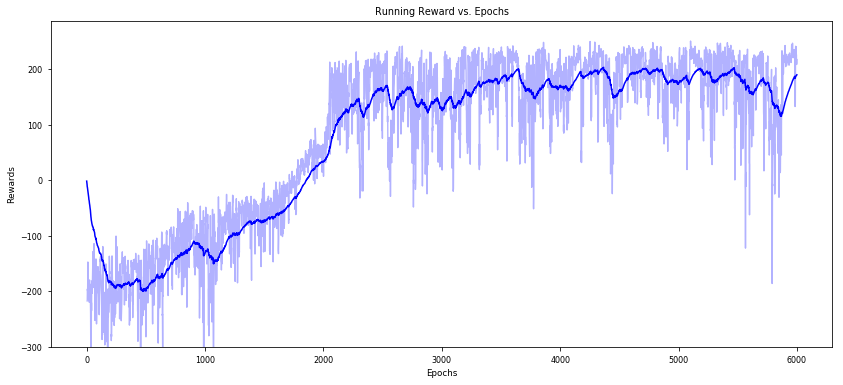

In [50]:
colors = np.array([[0, 0, 255], [0, 100, 0], [0, 0, 255], [128, 0, 0], [255, 0, 255]])
colors = (colors / 255).tolist()
# labels = ['0.95', '0.96', '0.97', '0.98', '0.99']
labels = ['8x8', '16x16', '32x32', '64x64']

for ix, v in enumerate([14]):
    with open('pg_v{}.pkl'.format(v), 'rb') as f:
        rewards, losses, times = pickle.load(f)
    idx = 6000
    roll = pd.Series(np.array(rewards[:idx])).rolling(5).mean()
    plt.plot(roll, label=None, color=colors[ix] + [0.3])
for ix, v in enumerate([14]):
    with open('pg_v{}.pkl'.format(v), 'rb') as f:
        rewards, losses, times = pickle.load(f)
    idx = 6000
    r = 0.0
    running_r = list()
    for i in rewards[:idx]:
        r = 0.99 * r + 0.01 * i
        running_r.append(r)
    plt.plot(running_r, label=labels[ix], color=colors[ix],  linewidth=1.5)
# plt.legend(loc='lower right')
plt.ylim(-300)
plt.xlabel('Epochs')
plt.ylabel('Rewards')
plt.title('Running Reward vs. Epochs')
plt.show()